Autosaving every 60 seconds
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


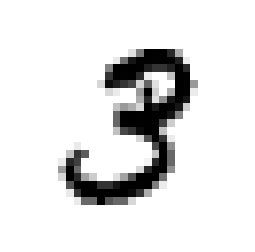

Rotating images with shape (55000, 28, 28, 1) for angle 90.0
Rotating images with shape (55000, 28, 28, 1) for angle 180.0
Rotating images with shape (55000, 28, 28, 1) for angle 270.0


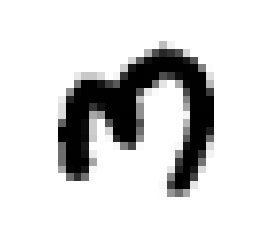

Finished generating images


In [11]:
%autosave 60

import math
import pickle
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers import batch_norm, dropout
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image, cmap = matplotlib.cm.binary,
        interpolation="nearest")
    plt.axis("off")
    plt.show()

def flatten(list_of_lists):
    return [element for a_list in list_of_lists for element in a_list]

some_digit = mnist.train.images[1]
show_image(some_digit.reshape(28, 28))

def degrees_to_radians(degrees):
    return degrees * math.pi / 180.0

def generate_rotate_images(images, angle_in_degrees):
    expected_rank = 4
    if len(images.shape) != expected_rank:
        raise Error("Unexpected rank.")
    print("Rotating images with shape", images.shape, "for angle", angle_in_degrees)
    return tf.contrib.image.rotate(images, degrees_to_radians(angle_in_degrees)).eval()
    
def generate_rotated_dataset(images, labels):
    if len(images) != len(labels):
        raise Error("images size is not equal to labels size.")
    reshaped_images = np.array([image.reshape(28, 28, 1) for image in images])
    angles_in_degrees = [90.0, 180.0, 270.0]
    generated_images = flatten([generate_rotate_images(reshaped_images, degrees) for degrees in angles_in_degrees])
    generated_labels = flatten([labels] * len(angles_in_degrees))
    return generated_images, generated_labels

with tf.Session().as_default() as sess:
    train_images, train_labels = generate_rotated_dataset(mnist.train.images, mnist.train.labels)
    
    i = 1123
    show_image(train_images[i].reshape(28, 28))
    print("Finished generating images")
    rotated_mnist_file_path = "./rotated_mnist_data.cpickle"
    with open(rotated_mnist_file_path, 'wb') as f:
        pickle.dump((train_images, train_labels), f)